In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
L=800
h=100
Ts=1200
def xS(a,h):return a*np.arccosh(1+h/a)
def S(a,h):return h*np.sqrt(2*a/h+1)
def xB(S):return L-S
def a(Th,w):return Th/w
def X(a):return L-S(a)-xS(a)
w=9.8*(7.8-1.025)*300/7.8*0.001

Tp=w*h
Th=Ts-Tp
a=a(Th,w)
S=S(a,h)
xB=xB(S)
xS=xS(a,h)
X=xB+xS
print('weight:',w,'Th:',Th,'a:',a,'S:',S,'xB:',xB,'xs:',xS,'X:',X)

weight: 2.5536538461538467 Th: 944.6346153846154 a: 369.9149032306649 S: 289.7981722615465 xB: 510.2018277384535 xs: 266.2158600696156 X: 776.4176878080691


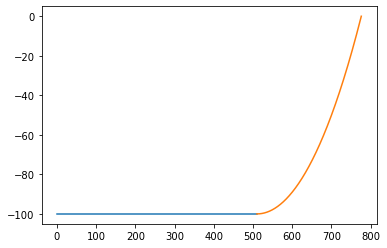

In [3]:
#task 1 shape
x1=np.linspace(0,xB,1000)
z1=0*x1-h

x2=np.linspace(xB,X,1000)
z2=a*np.cosh((x2-xB)/a)-a-h

plt.plot(x1,z1,x2,z2)
plt.show()


In [4]:
#task 2
def xS(a,h):return a*np.arccosh(1+h/a)
def S(a,h):return h*np.sqrt(2*a/h+1)
def xB(S):return L-S
def a(Th,w):return Th/w
def X(Th,w,h):return xS(a(Th,w),h)+xB(S(a(Th,w),h))
L=800;h=100;Ts=1200;w=9.8*(7.8-1.025)*300/7.8*0.001;f1=3000
Tp=Ts-w*h
q1=X(Tp+f1,w,h)-X(Tp,w,h)
xB1=xB(S(a(Tp+f1,w),h))
xS1=xS(a(Tp+f1,w),h)
X1=X(Tp+f1,w,h)
S1=S(a(Tp+f1,w),h)

xB2=xB(S(a(f1-Tp,w),h))
xS2=xS(a(f1-Tp,w),h)
X2=X(f1-Tp,w,h)
print(S1)
print('q1:',q1)
print('xB1:',xB1,'xS1:',xS1,'X1:',X1)
print('xB2:',xB2,'xS2:',xS2,'X2:',X2)


564.7481139954922
q1: 11.702602770761132
xB1: 235.2518860045078 xS1: 552.8684045743224 X1: 788.1202905788302
xB2: 386.50940643202114 xS2: 397.17420840106126 X2: 783.6836148330824


1544.702161307327
804.8723548459973


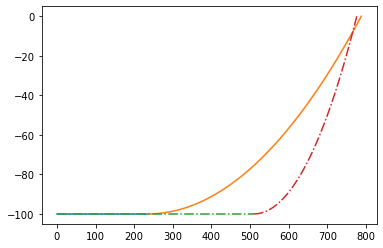

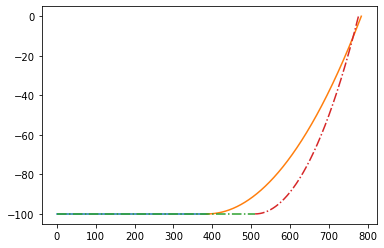

In [5]:
#task2 shape
#left side

xl=np.linspace(0,xB1,1000)
zl=0*xl-100
xr=np.linspace(0,xB2,1000)
zr=0*xr-100

a2=a(f1+Tp,w)
print(a2)
a3=a(f1-Tp,w)
print(a3)

xl2=np.linspace(xB1,X1,1000)
zl2=a2*np.cosh((xl2-xB1)/a2)-a2-h

xr2=np.linspace(xB2,X2,1000)
zr2=a3*np.cosh((xr2-xB2)/a3)-a3-h

plt.plot(xl,zl,xl2,zl2)
plt.plot(x1,z1,x2,z2,linestyle='dashdot')
plt.show()
plt.plot(xr,zr,xr2,zr2)
plt.plot(x1,z1,x2,z2,linestyle='dashdot')
plt.show()

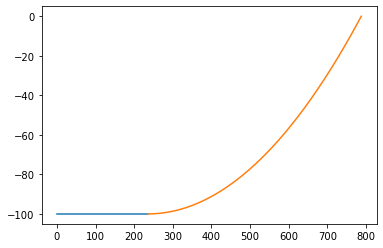

In [6]:
plt.plot(xl,zl,xl2,zl2)

plt.show()

In [35]:
#task3
#at equilibrium
def F(theta,F,N):return np.array([[-F*math.cos(theta)],[-F*math.sin(theta)],[N]])
def G(theta,r):
    G=np.full([3,theta.size],np.NaN)

    for i in range(theta.size):
        G[0,i]=math.cos(theta[i])
        G[1,i]=math.sin(theta[i])
        x=r*math.cos(theta[i]);y=r*math.sin(theta[i])
        G[2,i]=x*math.sin(theta[i])-y*math.cos(theta[i])
    return G

def pinv(M):
    MMT=np.dot(M,M.transpose())
    return np.dot(M.transpose(),np.linalg.pinv(MMT))
#reaction to environmental force
theta_F=150;force_env=500
F_R=-F(np.radians(theta_F),force_env,0)
#mooring configuration
theta_moorings=np.array([90,180,270,360])
radius_platform=10
Tp=1200
#mooring line tension allocation allocation matrix
G_M=G(np.radians(theta_moorings),radius_platform)
Ginv=pinv(G_M)
#reaction
T=np.dot(Ginv,F_R)+Tp

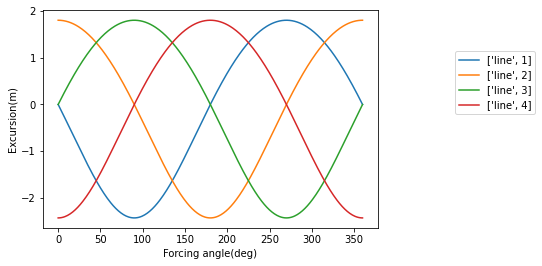

In [36]:
#excursion to forcing angle plot
theta_mooring=np.array([90,180,270,360])
theta=np.linspace(0,360,360)
X_all=np.full([theta_moorings.size,theta.size],np.NaN)

for i in range(theta.size):
    F_R=F(np.radians(theta[i]),force_env,0)
    T=np.dot(Ginv,F_R)+Tp
    
    for j in range(theta_moorings.size):
        X_all[j,i]=X(float(T[j]),w,h)-X(float(Tp),w,h)
        
for j in range(theta_moorings.size):
    plt.plot(theta,X_all[j,:],label=['line',j+1])
plt.legend(bbox_to_anchor=(1.35,0.5),loc='lower center');
plt.ylabel(r'Excursion(m)');plt.xlabel(r'Forcing angle(deg)');
plt.show()

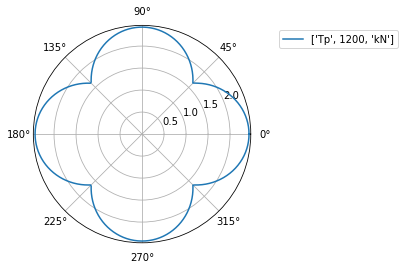

In [37]:
X_max=np.full([theta.size],np.NaN)

for i in range(theta.size):
    X_max[i]=max(abs(X_all[:,i]))
    
plt.polar(np.radians(theta),X_max,label=['Tp',Tp,'kN'])
plt.legend(bbox_to_anchor=(1.7,1),loc=0)
plt.show()

In [16]:
#task4
D=0.20
Cd=0.75
M0=26000
Ma=-5
vv_std=2.3
a_std=1.3
rho=1025
#print(w)
T_mean=(Th+w*h+f1)  #N
dtau=(T_mean-w*h)/(w*h)
Mt=M0+(S1-h)/(dtau)*Ma
Tdyn=Mt*(1+dtau)*a_std+0.5*rho*Cd*dtau*h*D*vv_std
print(T_mean)
print(Tdyn)

4200.0
825815.5558807696


In [17]:
Tmax=11.4 #s
aD=1.2*10**11
m=3
Tlow=0.06*10**6

am_dyn=Tdyn/(np.pi*(D/2)**2)*2*10**(-6)
am_low=Tlow/(np.pi*(D/2)**2)*2*10**(-6)

def Nc(amplitude,aD,m):
    return aD*amplitude**(-m)
def D(Nc,n):
    return n/Nc

n_dyn=5*7*24*60*60/Tmax
n_low=(50*365-5*7)*24*60*60/3

D_dyn=D(Nc(am_dyn,aD,m),n_dyn)
D_low=D(Nc(am_low,aD,m),n_low)
D=D_dyn+D_low

print('dynamic A:',Nc(am_dyn,aD,m),'Lowest A:',Nc(am_low,aD,m))
print('Damage dynamically:',D_dyn,'Damage lowest',D_low)
print('Total damage:',D)

dynamic A: 825831.9840858479 Lowest A: 2153213658.354155
Damage dynamically: 0.3212071741062065 Damage lowest 0.2436321160998861
Total damage: 0.5648392902060926
